### PERSONALITY TYPE INDICATOR

In [1]:
#Setting the current working directory

import os

location = os.chdir("C:/Users/Mounika/Documents/monica work/KAGGLE/INSOFE INTERNSHIP/Data/mbti-myers-briggs-personality-type-dataset")

In [2]:
#Reading the dataset

import pandas as pd

mbti_data = pd.read_csv("mbti_1.csv")

In [74]:
#Displaying the top 5 records

mbti_data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


### Understanding the data

In [75]:
#Understanding the dimensions of data

mbti_data.shape # We have 8675 records and 2 features.

(8675, 2)

In [76]:
#Understanding the attributes

print("Data types of attributes\n",(mbti_data.dtypes))
print("\nColumn names of attributes\n",mbti_data.columns)

Data types of attributes
 type     object
posts    object
dtype: object

Column names of attributes
 Index(['type', 'posts'], dtype='object')


In [77]:
#Checking for duplicate records

mbti_data.duplicated().sum()

0

In [78]:
#Checking for missing values 

pd.isna(mbti_data).sum() #There are no missing values

type     0
posts    0
dtype: int64

In [79]:
#Unique classes in the dataset

import numpy as np

np.unique(mbti_data.type)

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


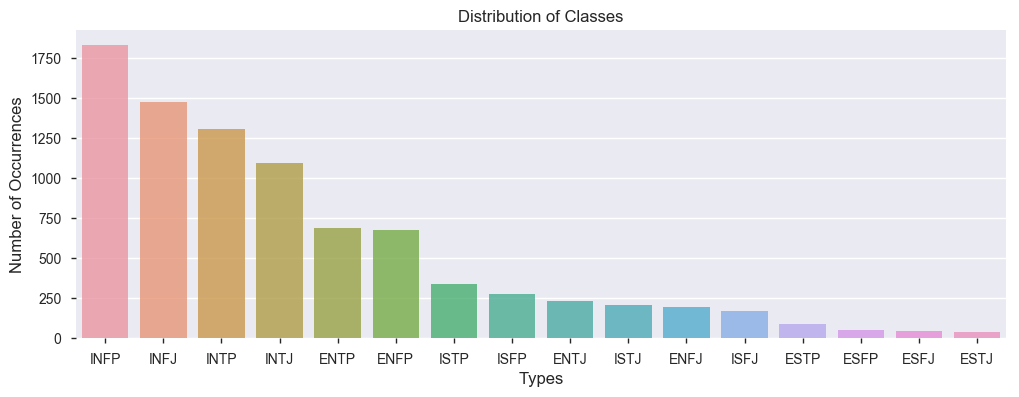

In [80]:
#Distribution of Classes

import seaborn as sns
import matplotlib.pyplot as plt

cnt_types = mbti_data['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_types.index, cnt_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.title('Distribution of Classes',)
plt.show()

In [81]:
group_records = pd.crosstab(index=mbti_data["type"],  # Make a crosstab
                              columns="count")
print(group_records)

col_0  count
type        
ENFJ     190
ENFP     675
ENTJ     231
ENTP     685
ESFJ      42
ESFP      48
ESTJ      39
ESTP      89
INFJ    1470
INFP    1832
INTJ    1091
INTP    1304
ISFJ     166
ISFP     271
ISTJ     205
ISTP     337


##### Building Word Clouds

A worldcloud is a collage of words and those words that are bigger in size have a high frequency.

#!pip install wordcloud

In [17]:
#To create distinct word cloud for each class

#create unique list of names
UniqueTypes = mbti_data.type.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueTypes}

for key in DataFrameDict.keys():
    DataFrameDict[key] = mbti_data[:][mbti_data.type == key]
    

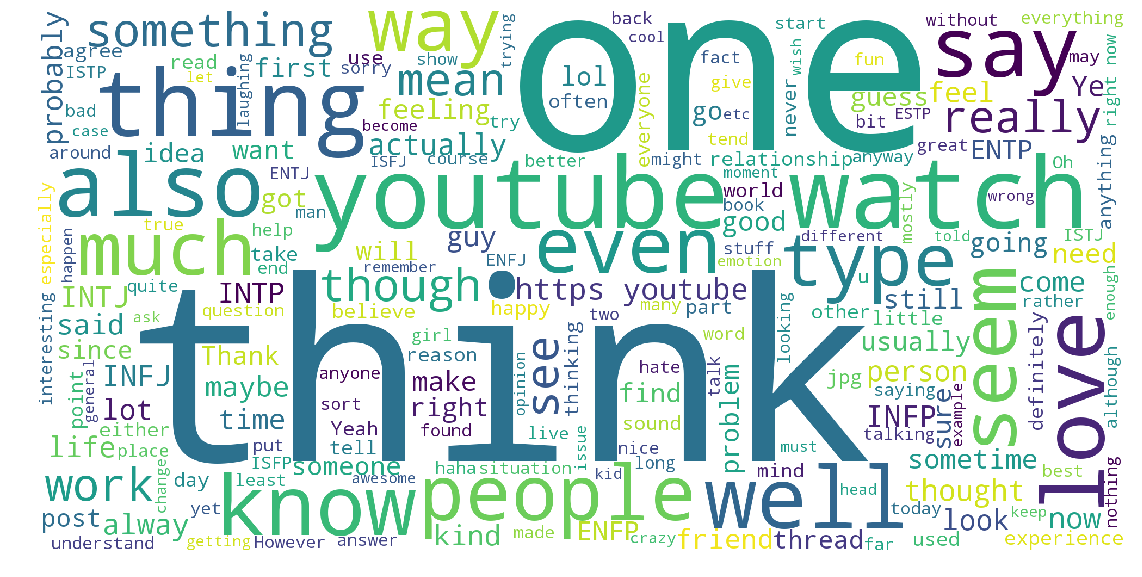

In [18]:
#Creating a wordcloud using all the posts

import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

plt.figure(figsize=(20,10))

wordCloud = WordCloud(background_color="white",width=2000,height=1000,mode="RGB").generate(''.join(mbti_data["posts"]))
plt.imshow(wordCloud)
plt.axis("off")
plt.show()


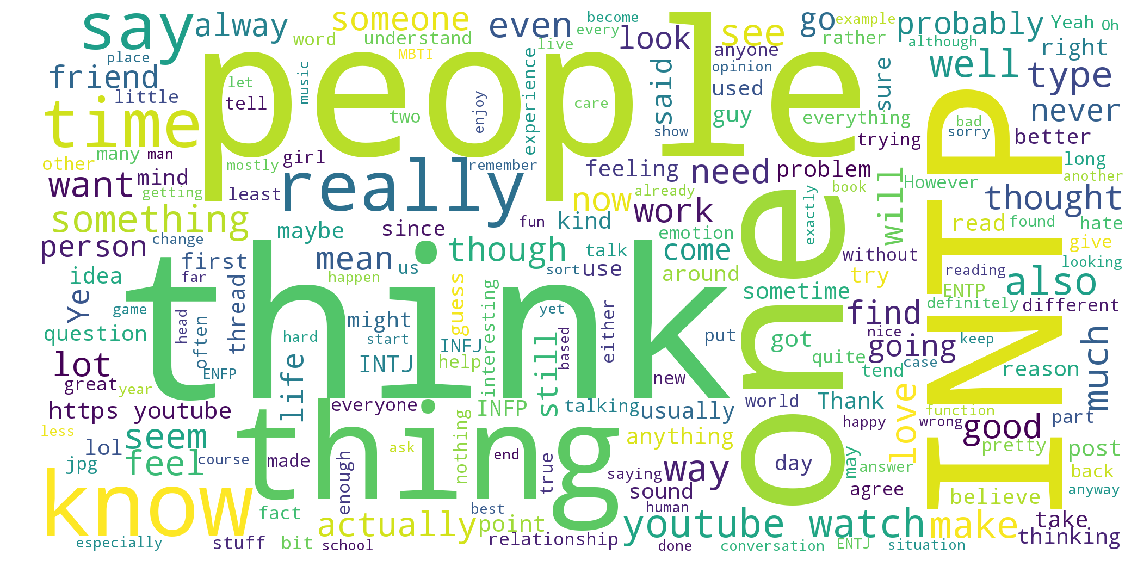

In [19]:
#WordCloud for INTP

import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

plt.figure(figsize=(20,10))

wordCloud = WordCloud(background_color="white",width=2000,height=1000,mode="RGB").generate(''.join(DataFrameDict["INTP"]["posts"]))
plt.imshow(wordCloud)
plt.axis("off")
plt.show()


As the wordclouds don't give enough information, we preprocess the data further to get meaningful insights

### Text PreProcessing

In [82]:
#First post

mbti_data.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

##### Removing the delimiters(|||)

In [83]:
import re
mbti_data["posts"] = mbti_data.apply(lambda row: ' '.join(re.sub("(\|\|\|)"," ",row["posts"]).split()), axis=1)

In [84]:
mbti_data.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks What has been the most life-changing experience in your life? http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206 Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as... 84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ... Welcome and stuff. http://p

### Handling URLs

Beautiful Soup is a library for pulling data out of HTML and XML files.

##### Trial 1: Replacing URLs with their descriptions

#Importing the necessary libraries

from urllib.request import urlopen #Library to query a website
from bs4 import BeautifulSoup
import re
import urllib.request
import requests

posts = [(row['posts']) for j,row in mbti_data.iterrows()] #Iterating through posts
post = posts[0]

url_pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+') #Specifying the URL pattern
for m in url_pattern.finditer(post):
    url = m.group()  #Takes URLs one by one
    request = requests.get(url)
    soup = BeautifulSoup(request.text)
    if request.status_code == 200: #Only if the URL is a valid one.
        with urllib.request.urlopen(url) as response:
            info = response.info()
            url_type = info.get_content_subtype()   
            if(url_type == 'html'):   #If it is a YouTube URL
                metas = soup.find_all('meta')
                #Retrieving the description of videos
                desc = [ meta.attrs['content'] for meta in metas if 'name' in meta.attrs and meta.attrs['name'] == 'description' ] 
                post = post.replace(url, ' '.join(desc))
            else:                   #If it is an image URL
                subscription_key = 'fa93a792e5af4ffd854e6840a20aab6f'
                assert subscription_key 
                vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/"
                vision_analyze_url = vision_base_url + "analyze"
                headers  = {'Ocp-Apim-Subscription-Key': subscription_key }
                params   = {'visualFeatures': 'Description'}
                data     = {'url': url}
                response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
                status = response.status_code #Returns the status code of specified URL.
                analysis = response.json()
                if(status == 200):
                    #Retrieving the captions of images
                    image_caption = analysis["description"]["captions"][0]["text"].capitalize()
                    post = post.replace(url, image_caption)
                else:
                    #Replacing with space if the given image doesn't contain any caption
                    post = post.replace(url, ' ')
    else:
        post = post.replace(url, ' ') #Replacing with space if the URL is not a valid one.
    

#mbti_data['posts'] = list(map(lambda post:sanitize(post),posts))
print(post)



Output : The text was replaced with the corresponding URL descriptions. But those descriptions contained other URLs which 
         introduced even more URLs into the text. So, I decided to strip off the URLs by replacing them with space.

##### Trial 2: Replacing the URLs with space

In [85]:
url_pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
mbti_data["posts"] = mbti_data.apply(lambda row: ' '.join(re.sub(url_pattern," ",row["posts"]).split()), axis=1)

In [86]:
mbti_data.posts[0]

"' enfp and intj moments sportscenter not top ten plays pranks What has been the most life-changing experience in your life? On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as... 84389 84390 ... Welcome and stuff. Game. Set. Match. Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative... Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by... All things in moderation. Sims is indeed a vid

##### Dealing with contractions

In [87]:
apostrophes_dict = {"can't":"cannot","'s": " is", "'ll":" will","n't" : " not","'ve" : " have","'d": " would","'m":" am","'re":" are",
                   "gimme": "give me","gonna":"going to","gotta" : "got to","o'er":"over"}

In [88]:
for apostrophe in apostrophes_dict:
    mbti_data["posts"] = mbti_data.apply(lambda row: ' '.join(re.sub(apostrophe,apostrophes_dict[apostrophe],row["posts"]).split()), axis=1)

In [89]:
mbti_data.posts[99]

"'Learning to say no, the right way, is the greatest talent you have yet to cultivate. Good luck :) You have to create the perfect love, True Love does exist, but it is something cultivated and lived for, not something you find at the coffee shop. meh, suppose so... I guess I just figured that was what I would have done. lol, you got to admit, that is what you get for seeking advice on the internet (and this is not a remark to be a dick, I... Maybe your N friends do not have much of a concept of God? To me, to know God is the ultimate depth. Even smart people are shallow to me (Ns or Ss), who do not know, or atleast try (honestly try) to... Curious... Viewers stay tuned. Maybe you should call. Thankyou for your prayers. I love how far we have managed to digress this thread. Ya, I have been through that cycle repeatabley, you sound well versed in addition. Though not unaware, it is so easy... I appreciate it, and actually, today was a great day! Thankyou, I am two cents richer :) It is 

#Removing punctuations from data

import re
import string

punctuations = string.punctuation
punctuations_pattern = r"[{}]".format(punctuations)

mbti_data["posts"] = mbti_data.apply(lambda row: ' '.join(re.sub(punctuations_pattern,"",row["posts"]).split()), axis=1)

###### Cleaning mispelled and slang words

#Importing spaCy 

import spacy
nlp = spacy.load("en")

import re
from autocorrect import spell

types_re = '[i|e][n|s][t|f][j|p]*'

slang_dictionary = [('^h+a+p+p+y+$','happy'),('^r+e+a+l+l+y+$','really'),('gr[8t]','great'),('brb','be right back'),('lol','laught out loud'),
                   ('^[ha]+$',' '),('\\bso+\\b','so'),('\\ba+l+\\b','all'),('sh!t','shit'),('lil','little'),('^[oh]+$',' '),('dunno',"don't know"),('donno',"don't know"),
                   ('wel+l+','well'),('lemme','let me'),('fav','favorite'),('mbti','MBTI'),('gawd','God'),('pls','please'),('omg','OH MY GOD'),('pls','please'),('yrs','years'),
                   ('hrs','hours')]

def lookup(s):
    flag = 0
    
    for pattern, value in slang_dictionary: #Checking the slang dictionary.
        if re.search(pattern, s.lower()): #If the token matches with any of the patterns in the slang dictionary, then its value is returned.
            flag =1 
            return value
    if flag == 0: #If its not in the slang dictionary, then it means it's a mispelled word.
        return spell(s)  #The correct spelling is returned.
    

for index, row in mbti_data[:2000].iterrows(): #Iterating through all the rows
    doc = nlp(row['posts'])
    for token in doc:    
        if token.lemma_ != '-PRON-' and token.lemma_ not in nlp.vocab and not re.search(types_re,token.lower_): #all the invalid words will go through this
            val = lookup(str(token)) #Cleaning the text
            row['posts'] = re.sub(re.escape(str(token)),val,row['posts']) #The cleaned token is replaced with the actual token.
            
       

In [90]:
#Writing the preprocessed data to a CSV file.

mbti_data.to_csv('MBTI_PreProcessed.csv')

In [1]:
import os

os.chdir("C:/Users/Mounika/Documents/monica work/KAGGLE/INSOFE INTERNSHIP/Data/mbti-myers-briggs-personality-type-dataset")

In [2]:
#Reading the preprocessed file
import pandas as pd

mbti_preprocessed = pd.read_csv("MBTI_PreProcessed.csv")

In [3]:
mbti_preprocessed.posts[0]

"' enfp and intj moments sportscenter not top ten plays pranks What has been the most life-changing experience in your life? On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ Hello ENFJ7. Sorry to hear of your distress. It is only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as... 84389 84390 ... Welcome and stuff. Game. Set. Match. Prozac, wellbrutin, at least thirty minutes of moving your legs (and I do not mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative... Basically come up with three items you have determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by... All things in moderation. Sims is indeed a

##### Analysing the word counts

In [92]:
mbti_tokens = mbti_preprocessed.apply(lambda row: nltk.word_tokenize(row["posts"]), axis=1) #Tokenizing the posts

#flatten the lists
tokens_list = [y for x in mbti_tokens for y in x]

print("tokens list",len(tokens_list))

lowertokens = [token.lower() for token in tokens_list]

from nltk.corpus import stopwords
stop = stopwords.words('english')
# print(stop)
mbtitokens = [token for token in lowertokens if token not in stop] #Eliminating stopwords


print("tokens without stopwords",len(mbtitokens))

word_count = nltk.FreqDist()

for token in mbtitokens:
    word_count[token] += 1

wordcountdict = dict(word_count)


import operator
sortedwordcount = sorted(wordcountdict.items(), key=operator.itemgetter(1),reverse = True)

print("sorted word count",len(sortedwordcount))

import json
with open('tokensortedfreqs.json', 'w') as f:
    json.dump(sortedwordcount, f)

tokens list 13145382
tokens without stopwords 7105905
sorted word count 162272


In [93]:
sortedwordcount = dict(sortedwordcount)
sortedwordcount

{'.': 567473,
 ',': 464089,
 '...': 286918,
 ':': 105502,
 '?': 75615,
 '!': 73328,
 'like': 69037,
 ')': 63396,
 '(': 53829,
 'would': 52731,
 'think': 49663,
 'people': 47481,
 'know': 36646,
 'one': 36578,
 'really': 35226,
 'get': 30663,
 'time': 27074,
 '-': 25758,
 'feel': 23208,
 'much': 23037,
 'well': 22210,
 'love': 20681,
 'good': 20526,
 'things': 20358,
 'say': 20151,
 'way': 19509,
 'something': 19390,
 'want': 19309,
 'see': 19017,
 'also': 18267,
 "'": 17773,
 'could': 17358,
 'even': 16856,
 'always': 16769,
 'type': 16652,
 'lot': 16392,
 'someone': 16065,
 'make': 15720,
 'never': 15182,
 'life': 15013,
 'go': 14894,
 'though': 14566,
 'going': 14126,
 'find': 14119,
 'thing': 14019,
 'actually': 13165,
 'infp': 12940,
 'person': 12664,
 'sure': 12608,
 'first': 12544,
 'right': 12465,
 'pretty': 12313,
 'yes': 12161,
 'friends': 11913,
 'infj': 11862,
 'need': 11506,
 ';': 11396,
 'intj': 11320,
 'got': 10961,
 'still': 10950,
 'work': 10761,
 'thought': 10522,
 'sa

In [94]:
#Calculating the counts of frequencies of occurences of words.

import itertools

wc_list = [(k, len(list(v))) for k, v in itertools.groupby(sorted(sortedwordcount.values()))]

In [95]:
wc_df = pd.DataFrame(wc_list,columns=['Frequency','Count'])

wc_df.shape

(1640, 2)

In [96]:
wc_df['cumsum'] = wc_df['Count'].cumsum()

C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


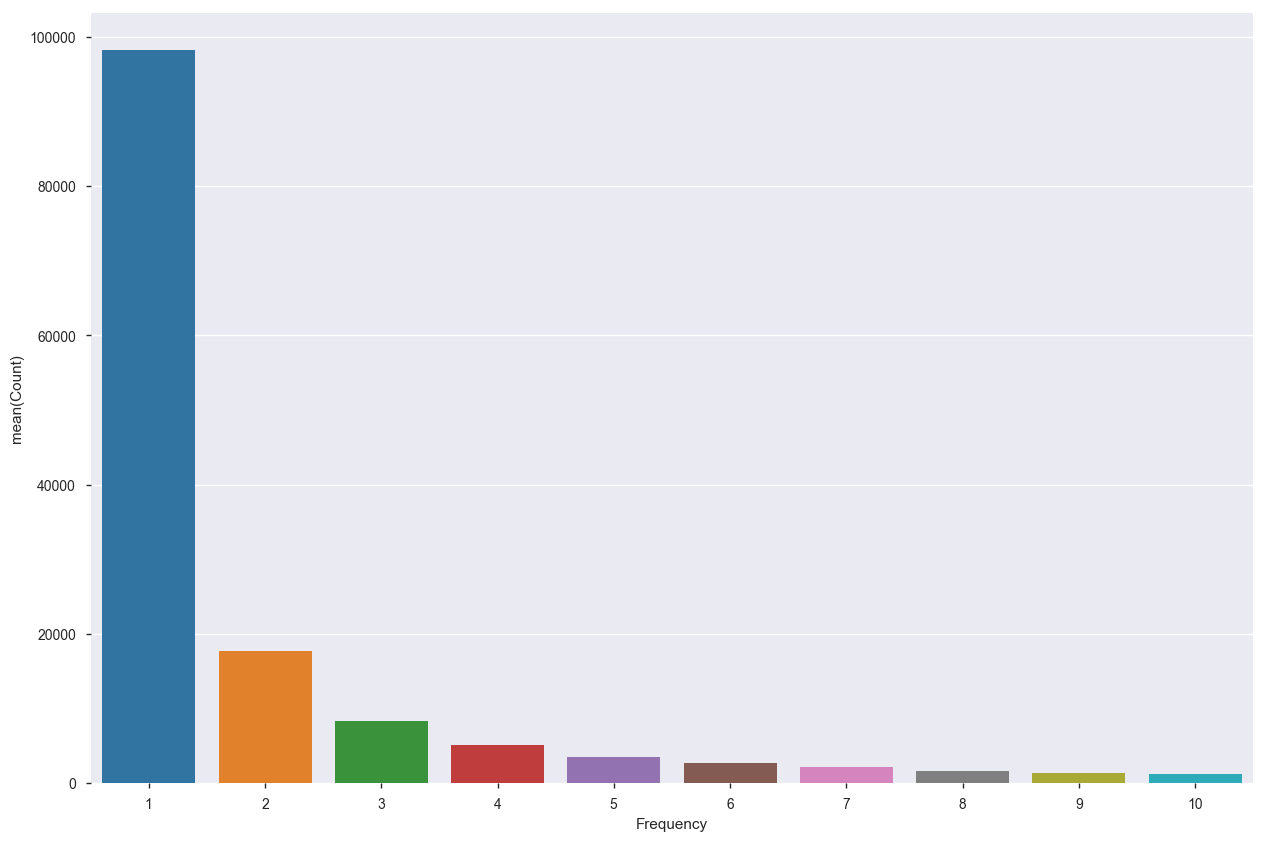

In [4]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
mbti_preprocessed['I-E'] = mbti_preprocessed['type'].astype(str).str[0]
mbti_preprocessed['I-E'] = mbti_preprocessed['I-E'].map(map1)
mbti_preprocessed['N-S'] = mbti_preprocessed['type'].astype(str).str[1]
mbti_preprocessed['N-S'] = mbti_preprocessed['N-S'].map(map2)
mbti_preprocessed['T-F'] = mbti_preprocessed['type'].astype(str).str[2]
mbti_preprocessed['T-F'] = mbti_preprocessed['T-F'].map(map3)
mbti_preprocessed['J-P'] = mbti_preprocessed['type'].astype(str).str[3]
mbti_preprocessed['J-P'] = mbti_preprocessed['J-P'].map(map4)
print(mbti_preprocessed.head(10))

   Unnamed: 0  type                                              posts  I-E  \
0           0  INFJ  ' enfp and intj moments sportscenter not top t...    0   
1           1  ENTP  'I am finding the lack of me in these posts ve...    1   
2           2  INTP  'Good one _____ Of course, to which I say I kn...    0   
3           3  INTJ  'Dear INTP, I enjoyed our conversation the oth...    0   
4           4  ENTJ  'You are fired. That is another silly misconce...    1   
5           5  INTJ  '18/37 @.@ Science is not perfect. No scientis...    0   
6           6  INFJ  'No, I cannot draw on my own nails (haha). Tho...    0   
7           7  INTJ  'I tend to build up a collection of things on ...    0   
8           8  INFJ  I am not sure, that is a good question. The di...    0   
9           9  INTP  ' I am in this position where I have to actual...    0   

   N-S  T-F  J-P  
0    0    1    0  
1    0    0    1  
2    0    0    1  
3    0    0    0  
4    0    0    0  
5    0    0    0

##### Feature Extraction from Text

In [5]:
#Implementing TF - IDF Vectorizer 

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Posts to a matrix of token counts
cntizer = CountVectorizer(analyzer="word", 
                             max_features=3000, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
                             max_df=0.7,
                             min_df=0.1) 

# Learn the vocabulary dictionary and return term-document matrix
print("CountVectorizer...")
X_cnt = cntizer.fit_transform(mbti_preprocessed['posts'])

# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

print("Tf-idf...")
# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()


CountVectorizer...
Tf-idf...


C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [6]:
#Extracting feature names

feature_names = list(enumerate(cntizer.get_feature_names()))
feature_names

[(0, '10'),
 (1, '100'),
 (2, '20'),
 (3, '30'),
 (4, 'ability'),
 (5, 'able'),
 (6, 'above'),
 (7, 'absolutely'),
 (8, 'accept'),
 (9, 'accurate'),
 (10, 'across'),
 (11, 'act'),
 (12, 'action'),
 (13, 'actual'),
 (14, 'actually'),
 (15, 'add'),
 (16, 'admit'),
 (17, 'advice'),
 (18, 'afraid'),
 (19, 'after'),
 (20, 'again'),
 (21, 'against'),
 (22, 'age'),
 (23, 'ago'),
 (24, 'agree'),
 (25, 'ah'),
 (26, 'almost'),
 (27, 'alone'),
 (28, 'along'),
 (29, 'already'),
 (30, 'although'),
 (31, 'amazing'),
 (32, 'amount'),
 (33, 'angry'),
 (34, 'annoying'),
 (35, 'another'),
 (36, 'answer'),
 (37, 'answers'),
 (38, 'anxiety'),
 (39, 'anymore'),
 (40, 'anyone'),
 (41, 'anything'),
 (42, 'anyway'),
 (43, 'apparently'),
 (44, 'appreciate'),
 (45, 'approach'),
 (46, 'argument'),
 (47, 'around'),
 (48, 'art'),
 (49, 'ask'),
 (50, 'asked'),
 (51, 'asking'),
 (52, 'assume'),
 (53, 'attention'),
 (54, 'attracted'),
 (55, 'avatar'),
 (56, 'avoid'),
 (57, 'aware'),
 (58, 'away'),
 (59, 'awesome'),
 

In [7]:
print("X: Posts in tf-idf representation \n* 1st row:\n%s" % X_tfidf[0])

X: Posts in tf-idf representation 
* 1st row:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05879721 0.         0.         0.06340681
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04617533
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08023082 0.
 0.         0.09777139 0.04877326 0.         0.         0.
 0.         0.04818855 0.         0.0633661  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.      

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = X_tfidf
Y = mbti_preprocessed["type"]
#Y = mbti_preprocessed['I-E']
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


clf = MultinomialNB().fit(X_train,y_train)
pred=clf.predict(X_test)


from sklearn.metrics import confusion_matrix
prediction=confusion_matrix(y_test,pred)
print(prediction)


# evaluate predictions
accuracy = accuracy_score(y_test, pred)
print(accuracy)

[[  0   0   0   1   0   0   0   0  21  29   0   1   0   0   0   0]
 [  0  24   0  10   0   0   0   0  23 135  11   6   0   0   0   0]
 [  0   0   0   2   0   0   0   0   7  33  14  17   0   0   0   0]
 [  0   2   0  47   0   0   0   0  32  67  11  70   0   0   0   0]
 [  0   0   0   1   0   0   0   0   5   4   0   1   0   0   0   0]
 [  0   0   0   1   0   0   0   0   8  13   1   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   6   1   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0  10  10   2   5   0   0   0   0]
 [  0   1   0   0   0   0   0   0 255 214   8  12   0   1   0   0]
 [  0   1   0   4   0   0   0   0  41 554   4  16   0   0   0   0]
 [  0   2   0   3   0   0   0   0  36 137 132  46   0   0   0   0]
 [  0   0   0   6   0   0   0   0  21 143   3 260   0   0   0   0]
 [  0   0   0   2   0   0   0   0  23  30   0   4   0   0   0   0]
 [  0   1   0   0   0   0   0   0  18  64   0   6   0   0   0   0]
 [  0   0   0   2   0   0   0   0   9  48   4   5   0   0   0 

In [29]:
from sklearn.metrics import classification_report
print (classification_report(y_test, pred))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        52
       ENFP       0.77      0.11      0.20       209
       ENTJ       0.00      0.00      0.00        73
       ENTP       0.56      0.21      0.30       229
       ESFJ       0.00      0.00      0.00        11
       ESFP       0.00      0.00      0.00        23
       ESTJ       0.00      0.00      0.00         9
       ESTP       0.00      0.00      0.00        28
       INFJ       0.49      0.52      0.50       491
       INFP       0.36      0.89      0.51       620
       INTJ       0.68      0.37      0.48       356
       INTP       0.54      0.60      0.57       433
       ISFJ       0.00      0.00      0.00        59
       ISFP       0.00      0.00      0.00        89
       ISTJ       0.00      0.00      0.00        68
       ISTP       0.00      0.00      0.00       113

avg / total       0.43      0.44      0.38      2863



C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
#Fit the SVM Model
from sklearn import svm

model = svm.SVC(kernel = 'linear')
model.fit(X_train,y_train)
svm_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, svm_pred)
print(accuracy)


0.6604959832343695


In [31]:
from sklearn.metrics import confusion_matrix
svm_conf=confusion_matrix(y_test,svm_pred)
print(svm_conf)

[[ 18   0   0   1   0   0   0   0  16   9   1   3   1   1   1   1]
 [  3 129   2   8   0   0   0   0  13  27  15   9   0   1   1   1]
 [  2   3  29   5   0   0   0   0   3   8   7  13   0   1   0   2]
 [  2   8   2 152   0   0   0   1  10  19   9  20   0   1   3   2]
 [  0   0   0   1   3   0   0   0   3   1   0   2   1   0   0   0]
 [  0   2   1   1   0   0   0   0   2   9   4   3   0   1   0   0]
 [  0   0   0   2   0   0   3   0   0   1   2   1   0   0   0   0]
 [  0   2   1   3   0   0   0  13   2   3   1   2   0   0   0   1]
 [  4  13   1   3   0   0   0   0 345  79  21  16   0   4   2   3]
 [  3   8   4  11   1   0   1   0  33 502  11  28   1   8   7   2]
 [  2  10   4  13   2   0   0   0  23  34 226  35   2   2   0   3]
 [  3   3   1  14   0   0   0   0  19  43  26 316   0   0   1   7]
 [  1   3   0   2   0   0   0   0   5   9   0   7  29   2   0   1]
 [  0   2   2   2   0   1   0   1   7  26   5   5   1  37   0   0]
 [  0   2   0   2   0   0   0   0   8   7  10   8   1   0  29 

In [32]:
#Classification report for SVM Model

from sklearn.metrics import classification_report
print (classification_report(y_test, svm_pred))

             precision    recall  f1-score   support

       ENFJ       0.47      0.35      0.40        52
       ENFP       0.67      0.62      0.64       209
       ENTJ       0.62      0.40      0.48        73
       ENTP       0.69      0.66      0.68       229
       ESFJ       0.50      0.27      0.35        11
       ESFP       0.00      0.00      0.00        23
       ESTJ       0.75      0.33      0.46         9
       ESTP       0.81      0.46      0.59        28
       INFJ       0.70      0.70      0.70       491
       INFP       0.63      0.81      0.71       620
       INTJ       0.65      0.63      0.64       356
       INTP       0.66      0.73      0.69       433
       ISFJ       0.78      0.49      0.60        59
       ISFP       0.60      0.42      0.49        89
       ISTJ       0.66      0.43      0.52        68
       ISTP       0.71      0.53      0.61       113

avg / total       0.66      0.66      0.65      2863



C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


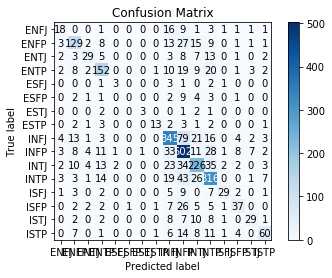

In [33]:
#Confusion matrix for SVM Model

import scikitplot.plotters as skplt
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(20,20))
skplt.plot_confusion_matrix(y_test, svm_pred)

In [18]:
#!pip install scikit-multilearn

You are using pip version 9.0.2, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [34]:
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = X_tfidf
#Y = mbti_preprocessed["type"]
target_cols = ['I-E','N-S','T-F','J-P']
Y = mbti_preprocessed[target_cols]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(MultinomialNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.3670974502270346

In [37]:
#Fit the SVM Model
from sklearn import svm

svm_classifier = BinaryRelevance(svm.SVC(kernel='linear'))

# train
svm_classifier.fit(X_train, y_train)

# predict
svm_predictions = svm_classifier.predict(X_test)

svm_accuracy = accuracy_score(y_test,svm_predictions)

In [38]:
print(svm_accuracy)

0.5738735592036326


In [39]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier_chain = ClassifierChain(MultinomialNB())

# train
classifier_chain.fit(X_train, y_train)

# predict
predictions_chain = classifier_chain.predict(X_test)

accuracy_score(y_test,predictions_chain)

0.38281522878099894

In [40]:
classifier_chain_svm = ClassifierChain(svm.SVC(kernel='linear'))

# train
classifier_chain_svm.fit(X_train, y_train)

# predict
predictions_chain_svm = classifier_chain_svm.predict(X_test)

accuracy_score(y_test,predictions_chain_svm)

0.58085923856095

In [26]:
#Sentence tokenization of posts

import nltk
mbti_sent_tokens = mbti_preprocessed.apply(lambda row: nltk.sent_tokenize(row["posts"]),axis=1)

In [41]:
mbti_sent_tokens

0       [' enfp and intj moments sportscenter not top ...
1       ['I am finding the lack of me in these posts v...
2       ['Good one _____ Of course, to which I say I k...
3       ['Dear INTP, I enjoyed our conversation the ot...
4       ['You are fired., That is another silly miscon...
5       ['18/37 @., @ Science is not perfect., No scie...
6       ['No, I cannot draw on my own nails (haha)., T...
7       ['I tend to build up a collection of things on...
8       [I am not sure, that is a good question., The ...
9       [' I am in this position where I have to actua...
10      ['One time my parents were fighting over my da...
11      [' 51 :o I went through a break up some months...
12      ['Joe santagato - ENTP ENFJ or ENTP?, I am not...
13      ['Fair enough, if that is how you want to look...
14      ['Basically this... Can I has Cheezburgr?, I a...
15      ['Your comment screams INTJ, bro., Especially ...
16      [isome of these both excite and calm me: BUTTS...
17      ['I th

In [43]:
mbti_sent_tokens[0]

["' enfp and intj moments sportscenter not top ten plays pranks What has been the most life-changing experience in your life?",
 'On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day.',
 'Rest in peace~ Hello ENFJ7.',
 'Sorry to hear of your distress.',
 'It is only natural for a relationship to not be perfection all the time in every moment of existence.',
 'Try to figure the hard times as times of growth, as... 84389 84390 ...',
 'Welcome and stuff.',
 'Game.',
 'Set.',
 'Match.',
 "Prozac, wellbrutin, at least thirty minutes of moving your legs (and I do not mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative... Basically come up with three items you have determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left

In [44]:
#Creating a dataframe of sentence tokens(just for ease of manipulations)

sentence_tokens = pd.DataFrame(mbti_sent_tokens,columns=['sent_tokens'])

In [45]:
sentence_tokens

,sent_tokens
0,[' enfp and intj moments sportscenter not top ...
1,['I am finding the lack of me in these posts v...
2,"['Good one _____ Of course, to which I say I k..."
3,"['Dear INTP, I enjoyed our conversation the ot..."
4,"['You are fired., That is another silly miscon..."
5,"['18/37 @., @ Science is not perfect., No scie..."
6,"['No, I cannot draw on my own nails (haha)., T..."
7,['I tend to build up a collection of things on...
8,"[I am not sure, that is a good question., The ..."
9,[' I am in this position where I have to actua...


In [46]:
#Preparing the input for Word2Vec

#Each record as word tokens
from nltk.tokenize import word_tokenize

tknzd_snt = []
wrdtkns = []
for i, row in sentence_tokens.iterrows():
    for j in range(len(mbti_sent_tokens[i])):
        wrdtkns+=word_tokenize(mbti_sent_tokens[i][j])
    tknzd_snt.append(wrdtkns)
    tknzd_sntnces  = tknzd_snt
    wrdtkns = []   

In [47]:
(tknzd_sntnces[0])

["'",
 'enfp',
 'and',
 'intj',
 'moments',
 'sportscenter',
 'not',
 'top',
 'ten',
 'plays',
 'pranks',
 'What',
 'has',
 'been',
 'the',
 'most',
 'life-changing',
 'experience',
 'in',
 'your',
 'life',
 '?',
 'On',
 'repeat',
 'for',
 'most',
 'of',
 'today',
 '.',
 'May',
 'the',
 'PerC',
 'Experience',
 'immerse',
 'you',
 '.',
 'The',
 'last',
 'thing',
 'my',
 'INFJ',
 'friend',
 'posted',
 'on',
 'his',
 'facebook',
 'before',
 'committing',
 'suicide',
 'the',
 'next',
 'day',
 '.',
 'Rest',
 'in',
 'peace~',
 'Hello',
 'ENFJ7',
 '.',
 'Sorry',
 'to',
 'hear',
 'of',
 'your',
 'distress',
 '.',
 'It',
 'is',
 'only',
 'natural',
 'for',
 'a',
 'relationship',
 'to',
 'not',
 'be',
 'perfection',
 'all',
 'the',
 'time',
 'in',
 'every',
 'moment',
 'of',
 'existence',
 '.',
 'Try',
 'to',
 'figure',
 'the',
 'hard',
 'times',
 'as',
 'times',
 'of',
 'growth',
 ',',
 'as',
 '...',
 '84389',
 '84390',
 '...',
 'Welcome',
 'and',
 'stuff',
 '.',
 'Game',
 '.',
 'Set',
 '.',
 '

In [25]:
#Each sentence as word tokens

from nltk.tokenize import word_tokenize

tokenized_sent = []
wordtokens = []
for i, row in sentence_tokens.iterrows():
    for j in range(len(mbti_sent_tokens[i])):
        wordtokens.append(word_tokenize(mbti_sent_tokens[i][j]))
    tokenized_sent.append(wordtokens)
    tokenized_sentences  = tokenized_sent
    wordtokens = []    

In [26]:
(tokenized_sentences[9])

[["'",
  'I',
  'am',
  'in',
  'this',
  'position',
  'where',
  'I',
  'have',
  'to',
  'actually',
  'let',
  'go',
  'of',
  'the',
  'person',
  ',',
  'due',
  'to',
  'a',
  'various',
  'reasons',
  '.'],
 ['Unfortunately',
  'I',
  'am',
  'having',
  'trouble',
  'mustering',
  'enough',
  'strength',
  'to',
  'actually',
  'pull',
  'through',
  'it',
  '.'],
 ['Sometimes', ',', '...', 'WHAT', 'A', 'YEAR', ',', 'MAN', '.'],
 ['WHAT', 'A', 'YEAR', '.'],
 ['I',
  'am',
  'just',
  'utterly',
  'bewildered',
  'with',
  'my',
  '20s',
  'at',
  'this',
  'point',
  '.'],
 ['my', 'laundry', '.'],
 ['as',
  'long',
  'as',
  'i',
  'have',
  'got',
  'clothes',
  'left',
  'to',
  'wear',
  'i',
  'am',
  'fine',
  '.'],
 ['and',
  'then',
  'the',
  'time',
  'comes',
  'that',
  'i',
  'DO',
  'run',
  'out',
  ',',
  'and',
  'i',
  'am',
  'left',
  'to',
  'contend',
  'with',
  'The',
  'Mountain',
  'that',
  'is',
  'my',
  'laundry',
  'pile',
  '.'],
 ['Sent',
  'fro

In [48]:
#Implementing Word2Vec

from gensim import models
model = models.Word2Vec(tknzd_sntnces, size=300, window=5, min_count=5, workers=4)

C:\Users\Mounika\Anaconda3\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Mounika\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [49]:
#Vectors for all the words in the vocabulary

model.wv.vocab

{"'": <gensim.models.keyedvectors.Vocab at 0x223b6386ba8>,
 'enfp': <gensim.models.keyedvectors.Vocab at 0x223b6386c50>,
 'and': <gensim.models.keyedvectors.Vocab at 0x223b6386d30>,
 'intj': <gensim.models.keyedvectors.Vocab at 0x223b65556a0>,
 'moments': <gensim.models.keyedvectors.Vocab at 0x223b658f748>,
 'not': <gensim.models.keyedvectors.Vocab at 0x223b658f7b8>,
 'top': <gensim.models.keyedvectors.Vocab at 0x223b94b16a0>,
 'ten': <gensim.models.keyedvectors.Vocab at 0x223b94b1860>,
 'plays': <gensim.models.keyedvectors.Vocab at 0x223b95303c8>,
 'pranks': <gensim.models.keyedvectors.Vocab at 0x223b9530400>,
 'What': <gensim.models.keyedvectors.Vocab at 0x223b9530550>,
 'has': <gensim.models.keyedvectors.Vocab at 0x223b9530438>,
 'been': <gensim.models.keyedvectors.Vocab at 0x223b9530470>,
 'the': <gensim.models.keyedvectors.Vocab at 0x223b9530588>,
 'most': <gensim.models.keyedvectors.Vocab at 0x223b95305c0>,
 'life-changing': <gensim.models.keyedvectors.Vocab at 0x223b95305f8>,
 '

In [50]:
#Number of vectors (equal to vocabulary size)

len(model.wv.vocab)

39576

In [51]:
#Printing list of words in the vocabulary..
words = list(model.wv.vocab)
print(words)
c = model.wv
(model.wv.vocab['e']) #Vector for word 'e'


["'", 'enfp', 'and', 'intj', 'moments', 'not', 'top', 'ten', 'plays', 'pranks', 'What', 'has', 'been', 'the', 'most', 'life-changing', 'experience', 'in', 'your', 'life', '?', 'On', 'repeat', 'for', 'of', 'today', '.', 'May', 'PerC', 'Experience', 'immerse', 'you', 'The', 'last', 'thing', 'my', 'INFJ', 'friend', 'posted', 'on', 'his', 'facebook', 'before', 'committing', 'suicide', 'next', 'day', 'Rest', 'Hello', 'Sorry', 'to', 'hear', 'distress', 'It', 'is', 'only', 'natural', 'a', 'relationship', 'be', 'perfection', 'all', 'time', 'every', 'moment', 'existence', 'Try', 'figure', 'hard', 'times', 'as', 'growth', ',', '...', 'Welcome', 'stuff', 'Game', 'Set', 'Match', 'Prozac', 'at', 'least', 'thirty', 'minutes', 'moving', 'legs', '(', 'I', 'do', 'mean', 'them', 'while', 'sitting', 'same', 'desk', 'chair', ')', 'weed', 'moderation', 'maybe', 'try', 'edibles', 'healthier', 'alternative', 'Basically', 'come', 'up', 'with', 'three', 'items', 'have', 'determined', 'that', 'each', 'type', 'o

In [52]:
len(set(model.wv.index2word))

39576

In [53]:
#Vector for the word laugh

model['laugh']

array([-1.19778287e+00,  2.16310993e-01,  7.84890577e-02, -1.39907193e+00,
        7.34070897e-01,  4.26774323e-02, -1.13329184e+00,  9.34201837e-01,
       -1.40811014e+00,  7.95348942e-01,  2.94674844e-01,  3.53048146e-01,
       -1.10854340e+00,  5.07181108e-01,  1.30219686e+00,  7.12424517e-01,
       -8.77466261e-01, -3.59318912e-01, -7.83018291e-01,  1.60216331e-01,
        8.33484530e-01, -5.08130431e-01,  5.73113620e-01,  1.34485930e-01,
       -2.46779561e-01, -3.20886374e-01,  4.21017528e-01, -2.96208203e-01,
        7.29846537e-01, -5.98020494e-01,  8.40797067e-01,  1.64175510e+00,
       -2.76924348e+00, -5.38250685e-01,  8.24007750e-01, -3.28860044e-01,
       -1.05740595e+00,  3.69607598e-01, -1.07937962e-01,  6.08780563e-01,
        1.40478384e+00, -1.24711788e+00, -1.19583440e+00,  1.38367128e+00,
        1.15903294e+00, -2.00554818e-01, -6.49305522e-01, -2.38565177e-01,
       -2.47542262e-01,  6.72066331e-01,  4.74431336e-01,  5.25047481e-01,
       -1.13733315e+00, -

In [54]:
model.wv.index2word[0]

'I'

In [55]:
model.most_similar('ENFJ')

[('ENFP', 0.9120050668716431),
 ('ISFJ', 0.9089864492416382),
 ('ISFP', 0.8918279409408569),
 ('ENTJ', 0.8881022334098816),
 ('ESFJ', 0.8879867792129517),
 ('ISTJ', 0.8859251737594604),
 ('ISTP', 0.8757016658782959),
 ('INFJ', 0.8735848665237427),
 ('ENTP', 0.8669973611831665),
 ('ESTP', 0.8669676780700684)]

##### Averaging the Word2Vec Embeddings for each records

In [56]:
import numpy as np

num_features=300

def make_feature_vec(words, model, num_features):
    
    #Average the word vectors for a set of words
   
    feature_vec = np.zeros((num_features,),dtype="float32")  # pre-initialize (for speed)
    nwords = 0
    index2word_set = set(model.wv.index2word)  # words known to the model

    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            feature_vec = np.add(feature_vec,model[word])
    
    feature_vec = np.divide(feature_vec, nwords)
    return feature_vec


def get_avg_feature_vecs(sentences, model, num_features):
   
    #Calculate average feature vectors for all reviews
   
    counter = 0
    mbti_feature_vecs = np.zeros((len(sentences),num_features), dtype='float32')  # pre-initialize (for speed)
    
    for sentence in sentences:
        mbti_feature_vecs[counter] = make_feature_vec(sentence, model, num_features)
        counter = counter + 1
    return mbti_feature_vecs

In [57]:
DataVecs = get_avg_feature_vecs(tknzd_sntnces, model, num_features)

In [33]:
DataVecs[0]

array([ 0.07734513, -0.37148318,  0.17505819, -0.37218887, -0.30504724,
        0.36058548, -0.55456156,  0.40900892,  0.22608483,  0.07340605,
       -0.11596183, -0.26500443, -0.05684689, -0.42834222,  0.27168807,
        0.21174927,  0.3162393 ,  0.2962902 ,  0.13014105,  0.04465168,
        0.10960494, -0.18547209,  0.0904904 ,  0.2683155 ,  0.04794008,
       -0.07896825, -0.15973262, -0.4973798 ,  0.01112653, -0.0478564 ,
        0.05866124,  0.21761633,  0.2891036 , -0.17874081,  0.00133184,
       -0.4078721 , -0.05036863, -0.18579553, -0.01277561, -0.00592433,
       -0.20268928, -0.09163274, -0.01297504, -0.5651379 ,  0.14477618,
        0.15671471,  0.3621011 , -0.19453321,  0.22848377, -0.07824596,
       -0.0091833 ,  0.2638021 , -0.3773155 , -0.0440851 , -0.09052008,
       -0.01252495, -0.03033158, -0.23390864, -0.1579348 , -0.04299365,
       -0.371402  ,  0.11024125,  0.32298642, -0.03382954, -0.1866653 ,
        0.11535738, -0.30705416,  0.37981802, -0.05037805, -0.01

In [45]:
#Converting the target variable to category type

mbti_preprocessed["type"] = mbti_preprocessed["type"].astype("category")

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = DataVecs
#Y = mbti_preprocessed["type"]
Y = mbti_preprocessed["I-E"]


# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)


In [35]:
#Fit the SVM Model
from sklearn import svm

model = svm.SVC(kernel = 'linear')
model.fit(X_train,y_train)
svm_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, svm_pred)
print(accuracy)

0.7701711491442543


In [36]:
#Cross Validation for SVM Model

from sklearn import svm
from sklearn.cross_validation import cross_val_score,cross_val_predict
svm_model = svm.SVC(kernel = 'linear',gamma=0.1)
scores = cross_val_score(svm_model, X, Y, cv=10, scoring='accuracy')

C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
scores.mean()

0.7695677850439973

In [39]:
#Implementing RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train,y_train)
forest_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, forest_pred)
print(accuracy)

0.7705204331121202


##### Building a CNN Classifier

In [40]:
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
nb_epochs = 50

In [41]:
# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index))
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

NameError: name 'word_index' is not defined

In [44]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
word_index = tokenizer.word_index
word_index

AttributeError: 'Tokenizer' object has no attribute 'word_index'

In [45]:
## Import Libraries 
import numpy as np      # for array operations
import pandas as pd     # for reading data operations

from keras.preprocessing.text import Tokenizer          # for tokenizing text
from keras.preprocessing.sequence import pad_sequences  # for padding sentences with zeros. To make the sentence length same
from keras.utils import to_categorical                  # for one-hot encoding of the labels
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding, GlobalMaxPooling1D
from keras.models import Sequential
from keras.models import Model

In [46]:
GLOVE_DIR = 'C:/Users/Mounika/Documents/monica work/INSOFE/ai and ds/RNN/rnn/rnn/glove.6B'
TEXT_DATA_DIR = 'C:/Users/Mounika/Documents/monica work/INSOFE/ai and ds/RNN/rnn/rnn/20newsgroup_lstm_1dcnn/20newsgroup/20news-18828'

MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
nb_epochs = 50

# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# second, prepare text samples and their labels
print('Processing text dataset')


Indexing word vectors.
Found 400000 word vectors.
Processing text dataset


In [262]:
types = mbti_preprocessed['type'].astype('category')
types = types.cat.codes
types = types.astype('category')

In [263]:
# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(mbti_preprocessed['posts'])
sequences = tokenizer.texts_to_sequences(mbti_preprocessed['posts'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


types = mbti_preprocessed['type']
labels = to_categorical(np.asarray(types))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


Found 117209 unique tokens.
Shape of data tensor: (8675, 1000)
Shape of label tensor: (8675, 16)


In [264]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]



from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, )

In [265]:
# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index))
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [276]:
len(labels)

8675

In [277]:
print('Training model.')

# train a 1D convnet with global maxpooling
print('Build model...')

from keras.models import Sequential
model = Sequential()
model.add(Embedding(num_words,
                    EMBEDDING_DIM,
                    input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='softmax'))

from keras.optimizers import Adam
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])

model_hist =  model.fit(x_train, y_train,
              batch_size=128,
              epochs=nb_epochs,validation_data = (x_test,y_test)).history

Training model.
Build model...
Train on 6506 samples, validate on 2169 samples
Epoch 1/50
6506/6506 [==============================] - 176s 27ms/step - loss: 2.3577 - acc: 0.1981 - val_loss: 2.2803 - val_acc: 0.1697
Epoch 2/50
6506/6506 [==============================] - 159s 24ms/step - loss: 2.2499 - acc: 0.2115 - val_loss: 2.1954 - val_acc: 0.2397
Epoch 3/50
6506/6506 [==============================] - 158s 24ms/step - loss: 2.0718 - acc: 0.3318 - val_loss: 1.9645 - val_acc: 0.3956
Epoch 4/50
6506/6506 [==============================] - 164s 25ms/step - loss: 1.7660 - acc: 0.4490 - val_loss: 1.8441 - val_acc: 0.4587
Epoch 5/50
6506/6506 [==============================] - 156s 24ms/step - loss: 1.3893 - acc: 0.5713 - val_loss: 1.9467 - val_acc: 0.4527
Epoch 6/50
6506/6506 [==============================] - 153s 23ms/step - loss: 1.0225 - acc: 0.6794 - val_loss: 2.4434 - val_acc: 0.4329
Epoch 7/50
6506/6506 [==============================] - 153s 24ms/step - loss: 0.7347 - acc: 0.7688

##### Building an LSTM

In [ ]:
print('Training model.')

from keras.layers import LSTM
# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
z = Dropout(0.2)(embedded_sequences)
z = LSTM(128)(z)
z = Dropout(0.4)(z)
preds_lstm = Dense(16, activation='softmax')(z)


from keras.optimizers import Adam
adam = Adam(lr=0.001)
model_lstm = Model(sequence_input, preds_lstm)
model_lstm.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])

model_lstm_hist = model_lstm.fit(x_train, y_train,
                  batch_size=128,
                  epochs=nb_epochs,
                  validation_data=(x_test, y_test)).history

Training model.
Train on 6506 samples, validate on 2169 samples
Epoch 1/50
6506/6506 [==============================] - 654s 101ms/step - loss: 2.3635 - acc: 0.1840 - val_loss: 2.2819 - val_acc: 0.2204
Epoch 2/50
6506/6506 [==============================] - 772s 119ms/step - loss: 2.3087 - acc: 0.1929 - val_loss: 2.2811 - val_acc: 0.2181
Epoch 3/50
6506/6506 [==============================] - 825s 127ms/step - loss: 2.2991 - acc: 0.1997 - val_loss: 2.2791 - val_acc: 0.2199
Epoch 4/50
6506/6506 [==============================] - 924s 142ms/step - loss: 2.2869 - acc: 0.1997 - val_loss: 2.2735 - val_acc: 0.2158
Epoch 5/50
6506/6506 [==============================] - 1066s 164ms/step - loss: 2.2823 - acc: 0.2058 - val_loss: 2.2734 - val_acc: 0.2162
Epoch 6/50
6506/6506 [==============================] - 1221s 188ms/step - loss: 2.2728 - acc: 0.2189 - val_loss: 2.2761 - val_acc: 0.2185
Epoch 7/50
6506/6506 [==============================] - 1943s 299ms/step - loss: 2.2759 - acc: 0.2113 - va